In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# %% tf.Graph represents a collection of tf.Operations
# You can create operations by writing out equations.
# By default, there is a graph: tf.get_default_graph()
# and any new operations are added to this graph.
# The result of a tf.Operation is a tf.Tensor, which holds
# the values.

# %% First a tf.Tensor
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

# %% Construct a tf.Session to execute the graph.
sess = tf.Session()
result = sess.run(x)

# %% Alternatively pass a session to the eval fn:
x.eval(session=sess)
# x.eval() does not work, as it requires a session!
# %% We can setup an interactive session if we don't
# want to keep passing the session around:
sess.close()
sess = tf.InteractiveSession()

# %% Now this will work!
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

In [2]:
def gabor(ksize=32):
    """Uses Tensorflow to compute a 2D Gabor Kernel.
    Parameters
    ----------
    ksize : int, optional
        Size of kernel.
    Returns
    -------
    gabor : np.ndarray
        Gabor kernel with ksize x ksize dimensions.
    """
    g = tf.Graph()
    with tf.Session(graph=g):
        z_2d = gauss2d(0.0, 1.0, ksize)
        ones = tf.ones((1, ksize))
        ys = tf.sin(tf.linspace(-3.0, 3.0, ksize))
        ys = tf.reshape(ys, [ksize, 1])
        wave = tf.matmul(ys, ones)
        gabor = tf.mul(wave, z_2d)
        return gabor.eval()

In [4]:
def gauss2d(mean, stddev, ksize):
    """Uses Tensorflow to compute a 2D Gaussian Kernel.
    Parameters
    ----------
    mean : float
        Mean of the Gaussian (e.g. 0.0).
    stddev : float
        Standard Deviation of the Gaussian (e.g. 1.0).
    ksize : int
        Size of kernel (e.g. 16).
    Returns
    -------
    kernel : np.ndarray
        Computed 2D Gaussian Kernel using Tensorflow.
    """
    z = gauss(mean, stddev, ksize)
    g = tf.Graph()
    with tf.Session(graph=g):
        z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))
        return z_2d.eval()

In [6]:
def gauss(mean, stddev, ksize):
    """Uses Tensorflow to compute a Gaussian Kernel.
    Parameters
    ----------
    mean : float
        Mean of the Gaussian (e.g. 0.0).
    stddev : float
        Standard Deviation of the Gaussian (e.g. 1.0).
    ksize : int
        Size of kernel (e.g. 16).
    Returns
    -------
    kernel : np.ndarray
        Computed Gaussian Kernel using Tensorflow.
    """
    g = tf.Graph()
    with tf.Session(graph=g):
        x = tf.linspace(-3.0, 3.0, ksize)
        z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                           (2.0 * tf.pow(stddev, 2.0)))) *
             (1.0 / (stddev * tf.sqrt(2.0 * 3.1415))))
        return z.eval()


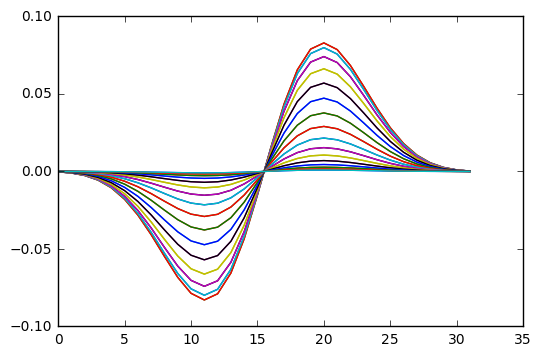

In [8]:
plt.plot(gabor())
plt.show()


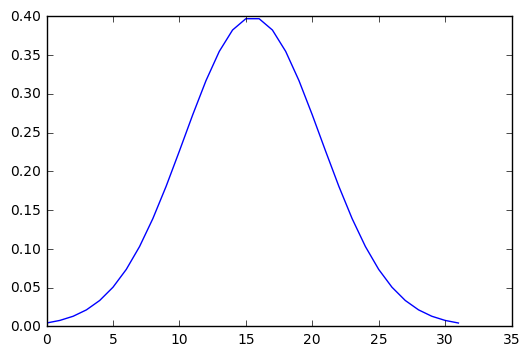

(32,)
[32]
[32]


In [4]:

# %% Now a tf.Operation
# We'll use our values from [-3, 3] to create a Gaussian Distribution
sigma = 1.0
mean = 0.0
z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

# %% By default, new operations are added to the default Graph
assert z.graph is tf.get_default_graph()

# %% Execute the graph and plot the result
plt.plot(z.eval())
plt.show()


# %% We can find out the shape of a tensor like so:
print(z.get_shape())

# %% Or in a more friendly format
print(z.get_shape().as_list())
# %% Sometimes we may not know the shape of a tensor
# until it is computed in the graph.  In that case
# we should use the tf.shape fn, which will return a
# Tensor which can be eval'ed, rather than a discrete
# value of tf.Dimension
print(tf.shape(z).eval())

In [5]:
# %% We can combine tensors like so:
print(tf.pack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


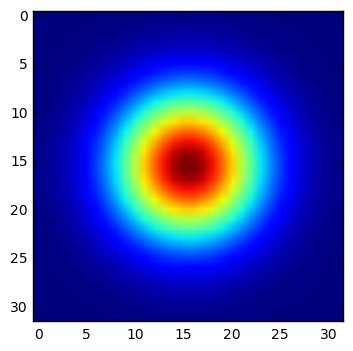

In [6]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())
plt.show()

In [1]:
# %% For fun let's create a gabor patch:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.mul(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())
plt.show()
# %% We can also list all the operations of a graph:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

NameError: name 'tf' is not defined

In [11]:
x.eval()

array([[-0.14112   ],
       [-0.32890242],
       [-0.50440228],
       [-0.6610654 ],
       [-0.79304177],
       [-0.89540261],
       [-0.96432537],
       [-0.99723619],
       [-0.99290609],
       [-0.95149666],
       [-0.87455446],
       [-0.76495272],
       [-0.62678432],
       [-0.46520925],
       [-0.2862615 ],
       [-0.09662336],
       [ 0.09662312],
       [ 0.28626129],
       [ 0.46520925],
       [ 0.62678415],
       [ 0.76495254],
       [ 0.8745544 ],
       [ 0.9514966 ],
       [ 0.99290609],
       [ 0.99723619],
       [ 0.96432549],
       [ 0.89540261],
       [ 0.79304188],
       [ 0.66106576],
       [ 0.50440228],
       [ 0.32890263],
       [ 0.14112   ]], dtype=float32)

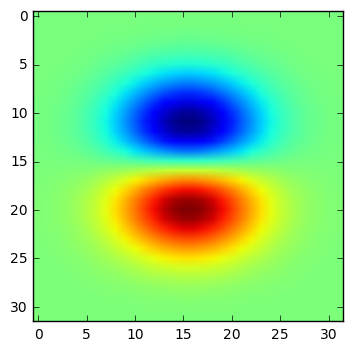

In [19]:
# %% Lets try creating a generic function for computing the same thing:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(tf.neg(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.mul(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

# %% Confirm this does something:
plt.imshow(gabor().eval())
plt.show()

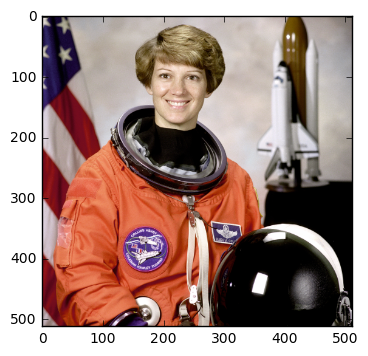

(512, 512, 3)


In [20]:
# %% And another function which can convolve
def convolve(img, W):
    # The W matrix is only 2D
    # But conv2d will need a tensor which is 4d:
    # height x width x n_input x n_output
    if len(W.get_shape()) == 2:
        dims = W.get_shape().as_list() + [1, 1]
        W = tf.reshape(W, dims)

    if len(img.get_shape()) == 2:
        # num x height x width x channels
        dims = [1] + img.get_shape().as_list() + [1]
        img = tf.reshape(img, dims)
    elif len(img.get_shape()) == 3:
        dims = [1] + img.get_shape().as_list()
        img = tf.reshape(img, dims)
        # if the image is 3 channels, then our convolution
        # kernel needs to be repeated for each input channel
        W = tf.concat(2, [W, W, W])

    # Stride is how many values to skip for the dimensions of
    # num, height, width, channels
    convolved = tf.nn.conv2d(img, W,
                             strides=[1, 1, 1, 1], padding='SAME')
    return convolved

# %% Load up an image:
from skimage import data
img = data.astronaut()
plt.imshow(img)
plt.show()
print(img.shape)

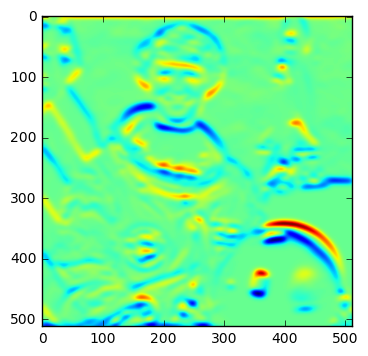

In [21]:
# %% Now create a placeholder for our graph which can store any input:
x = tf.placeholder(tf.float32, shape=img.shape)

# %% And a graph which can convolve our image with a gabor
out = convolve(x, gabor())

# %% Now send the image into the graph and compute the result
result = tf.squeeze(out).eval(feed_dict={x: img})
plt.imshow(result)
plt.show()

In [1]:
# importing needed libraries
%matplotlib inline

import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import tensorflow as tf
import math

In [2]:
x = tf.constant([35, 40, 45], name='x')
y = tf.Variable(x + 5, name='y')


model = tf.global_variables_initializer()

with tf.Session() as session:
	session.run(model)
	print(session.run(y))


[40 45 50]


In [4]:
import numpy as np
data = np.random.randint(1000, size=10000)

x = tf.Variable(0, name='x')


model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    for i in range(5):
        #
        x = x + 1
        print(session.run(x))

1
2
3
4
5


In [11]:
x = tf.constant(35, name='x')
print(x)
y = tf.Variable(x + 5, name='y')

with tf.Session() as session:
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter("/tmp/basic", session.graph)
    model =  tf.global_variables_initializer()
    session.run(model)
    print(session.run(y))

Tensor("x_6:0", shape=(), dtype=int32)
40


In [1]:
import tensorflow as tf

a = tf.add(1, 2,)
b = tf.mul(a, 3)
c = tf.add(4, 5,)
d = tf.mul(c, 6,)
e = tf.mul(4, 5,)
f = tf.div(c, 6,)
g = tf.add(b, d)
h = tf.mul(g, f)

with tf.Session() as sess:
	print(sess.run(h))

63


In [2]:
with tf.Session() as sess:
	writer = tf.summary.FileWriter("output", sess.graph)
	print(sess.run(h))
	writer.close()

63
